# Part-of-Speech (POS) tagging

**Part-of-speech (POS) tagging** asigna a cada token/palabra de una secuencia (oración) una etiqueta (tag) de acuerdo con la función gramatical que desempeña dentro de la oración: nombre, sustantivo, preposición, determinante, adjetivo, adverbio, verbo, complemento directo o indirecto, y otros. 



## POS usando spaCy

Documentación de spaCy: https://spacy.io/usage/linguistic-features

Etiquetas POS de granularidad gruesa: sustantivo, verbo, adjetivo
tiquetas de grano fino: sustantivo plural, verbo en tiempo pasado, adjetivo superlativo


In [2]:
# Modelo estadístico preentrenado
import spacy
nlp = spacy.load('en_core_web_sm')

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [0]:
# Creamos un objeto doc
doc = nlp("The quick brown fox jumped over the lazy dog's back.")

### Etiquetas POS de cada token
Se puede obtener la etiqueta de un token particular por su índice en el documento:

* Para ver la etiqueta POS gruesa, use token.pos_
* Para ver la etiqueta de grano fino, use token.tag_
* Para ver la descripción de cualquier tipo de etiqueta, use spacy.explain (tag)

Tenga en cuenta que `token.pos` y` token.tag` devuelven valores hash enteros; al agregar los guiones bajos obtenemos el texto equivalente que se encuentra en **doc.vocab**.

In [0]:
print(doc.text)

The quick brown fox jumped over the lazy dog's back.


In [0]:
# Imprimimos la quinta palabra y sus etiquetas:
print(doc[4].text, 
      doc[4].pos_, 
      doc[4].tag_, 
      spacy.explain(doc[4].tag_))

jumped VERB VBD verb, past tense


Hacer lo mismo para todo el documento:

In [0]:
for token in doc:
    print(f'{token.text:{10}} {token.pos_:{8}} {token.tag_:{6}} {spacy.explain(token.tag_)}')

The        DET      DT     determiner
quick      ADJ      JJ     adjective
brown      ADJ      JJ     adjective
fox        NOUN     NN     noun, singular or mass
jumped     VERB     VBD    verb, past tense
over       ADP      IN     conjunction, subordinating or preposition
the        DET      DT     determiner
lazy       ADJ      JJ     adjective
dog        NOUN     NN     noun, singular or mass
's         PART     POS    possessive ending
back       NOUN     NN     noun, singular or mass
.          PUNCT    .      punctuation mark, sentence closer


#### Etiquetas POS de grano grueso (pos_)
A cada token se le asigna una etiqueta POS de la siguiente lista:

> Bloque con sangría




<table><tr><th>POS</th><th>DESCRIPTION</th><th>EXAMPLES</th></tr>
    
<tr><td>ADJ</td><td>adjective</td><td>*big, old, green, incomprehensible, first*</td></tr>
<tr><td>ADP</td><td>adposition</td><td>*in, to, during*</td></tr>
<tr><td>ADV</td><td>adverb</td><td>*very, tomorrow, down, where, there*</td></tr>
<tr><td>AUX</td><td>auxiliary</td><td>*is, has (done), will (do), should (do)*</td></tr>
<tr><td>CONJ</td><td>conjunction</td><td>*and, or, but*</td></tr>
<tr><td>CCONJ</td><td>coordinating conjunction</td><td>*and, or, but*</td></tr>
<tr><td>DET</td><td>determiner</td><td>*a, an, the*</td></tr>
<tr><td>INTJ</td><td>interjection</td><td>*psst, ouch, bravo, hello*</td></tr>
<tr><td>NOUN</td><td>noun</td><td>*girl, cat, tree, air, beauty*</td></tr>
<tr><td>NUM</td><td>numeral</td><td>*1, 2017, one, seventy-seven, IV, MMXIV*</td></tr>
<tr><td>PART</td><td>particle</td><td>*'s, not,*</td></tr>
<tr><td>PRON</td><td>pronoun</td><td>*I, you, he, she, myself, themselves, somebody*</td></tr>
<tr><td>PROPN</td><td>proper noun</td><td>*Mary, John, London, NATO, HBO*</td></tr>
<tr><td>PUNCT</td><td>punctuation</td><td>*., (, ), ?*</td></tr>
<tr><td>SCONJ</td><td>subordinating conjunction</td><td>*if, while, that*</td></tr>
<tr><td>SYM</td><td>symbol</td><td>*$, %, §, ©, +, −, ×, ÷, =, :), 😝*</td></tr>
<tr><td>VERB</td><td>verb</td><td>*run, runs, running, eat, ate, eating*</td></tr>
<tr><td>X</td><td>other</td><td>*sfpksdpsxmsa*</td></tr>
<tr><td>SPACE</td><td>space</td></tr>

#### Etiquetas POS de grano fino (tag_)
Cada token recibe además una etiqueta POS de grano fino de la siguiente lista:
<table>
<tr><th>POS</th><th>Description</th><th>Fine-grained Tag</th><th>Description</th><th>Morphology</th></tr>
<tr><td>ADJ</td><td>adjective</td><td>AFX</td><td>affix</td><td>Hyph=yes</td></tr>
<tr><td>ADJ</td><td></td><td>JJ</td><td>adjective</td><td>Degree=pos</td></tr>
<tr><td>ADJ</td><td></td><td>JJR</td><td>adjective, comparative</td><td>Degree=comp</td></tr>
<tr><td>ADJ</td><td></td><td>JJS</td><td>adjective, superlative</td><td>Degree=sup</td></tr>
<tr><td>ADJ</td><td></td><td>PDT</td><td>predeterminer</td><td>AdjType=pdt PronType=prn</td></tr>
<tr><td>ADJ</td><td></td><td>PRP\$</td><td>pronoun, possessive</td><td>PronType=prs Poss=yes</td></tr>
<tr><td>ADJ</td><td></td><td>WDT</td><td>wh-determiner</td><td>PronType=int rel</td></tr>
<tr><td>ADJ</td><td></td><td>WP\$</td><td>wh-pronoun, possessive</td><td>Poss=yes PronType=int rel</td></tr>
<tr><td>ADP</td><td>adposition</td><td>IN</td><td>conjunction, subordinating or preposition</td><td></td></tr>
<tr><td>ADV</td><td>adverb</td><td>EX</td><td>existential there</td><td>AdvType=ex</td></tr>
<tr><td>ADV</td><td></td><td>RB</td><td>adverb</td><td>Degree=pos</td></tr>
<tr><td>ADV</td><td></td><td>RBR</td><td>adverb, comparative</td><td>Degree=comp</td></tr>
<tr><td>ADV</td><td></td><td>RBS</td><td>adverb, superlative</td><td>Degree=sup</td></tr>
<tr><td>ADV</td><td></td><td>WRB</td><td>wh-adverb</td><td>PronType=int rel</td></tr>
<tr><td>CONJ</td><td>conjunction</td><td>CC</td><td>conjunction, coordinating</td><td>ConjType=coor</td></tr>
<tr><td>DET</td><td>determiner</td><td>DT</td><td>determiner</td><td></td></tr>
<tr><td>INTJ</td><td>interjection</td><td>UH</td><td>interjection</td><td></td></tr>
<tr><td>NOUN</td><td>noun</td><td>NN</td><td>noun, singular or mass</td><td>Number=sing</td></tr>
<tr><td>NOUN</td><td></td><td>NNS</td><td>noun, plural</td><td>Number=plur</td></tr>
<tr><td>NOUN</td><td></td><td>WP</td><td>wh-pronoun, personal</td><td>PronType=int rel</td></tr>
<tr><td>NUM</td><td>numeral</td><td>CD</td><td>cardinal number</td><td>NumType=card</td></tr>
<tr><td>PART</td><td>particle</td><td>POS</td><td>possessive ending</td><td>Poss=yes</td></tr>
<tr><td>PART</td><td></td><td>RP</td><td>adverb, particle</td><td></td></tr>
<tr><td>PART</td><td></td><td>TO</td><td>infinitival to</td><td>PartType=inf VerbForm=inf</td></tr>
<tr><td>PRON</td><td>pronoun</td><td>PRP</td><td>pronoun, personal</td><td>PronType=prs</td></tr>
<tr><td>PROPN</td><td>proper noun</td><td>NNP</td><td>noun, proper singular</td><td>NounType=prop Number=sign</td></tr>
<tr><td>PROPN</td><td></td><td>NNPS</td><td>noun, proper plural</td><td>NounType=prop Number=plur</td></tr>
<tr><td>PUNCT</td><td>punctuation</td><td>-LRB-</td><td>left round bracket</td><td>PunctType=brck PunctSide=ini</td></tr>
<tr><td>PUNCT</td><td></td><td>-RRB-</td><td>right round bracket</td><td>PunctType=brck PunctSide=fin</td></tr>
<tr><td>PUNCT</td><td></td><td>,</td><td>punctuation mark, comma</td><td>PunctType=comm</td></tr>
<tr><td>PUNCT</td><td></td><td>:</td><td>punctuation mark, colon or ellipsis</td><td></td></tr>
<tr><td>PUNCT</td><td></td><td>.</td><td>punctuation mark, sentence closer</td><td>PunctType=peri</td></tr>
<tr><td>PUNCT</td><td></td><td>''</td><td>closing quotation mark</td><td>PunctType=quot PunctSide=fin</td></tr>
<tr><td>PUNCT</td><td></td><td>""</td><td>closing quotation mark</td><td>PunctType=quot PunctSide=fin</td></tr>
<tr><td>PUNCT</td><td></td><td>``</td><td>opening quotation mark</td><td>PunctType=quot PunctSide=ini</td></tr>
<tr><td>PUNCT</td><td></td><td>HYPH</td><td>punctuation mark, hyphen</td><td>PunctType=dash</td></tr>
<tr><td>PUNCT</td><td></td><td>LS</td><td>list item marker</td><td>NumType=ord</td></tr>
<tr><td>PUNCT</td><td></td><td>NFP</td><td>superfluous punctuation</td><td></td></tr>
<tr><td>SYM</td><td>symbol</td><td>#</td><td>symbol, number sign</td><td>SymType=numbersign</td></tr>
<tr><td>SYM</td><td></td><td>\$</td><td>symbol, currency</td><td>SymType=currency</td></tr>
<tr><td>SYM</td><td></td><td>SYM</td><td>symbol</td><td></td></tr>
<tr><td>VERB</td><td>verb</td><td>BES</td><td>auxiliary "be"</td><td></td></tr>
<tr><td>VERB</td><td></td><td>HVS</td><td>forms of "have"</td><td></td></tr>
<tr><td>VERB</td><td></td><td>MD</td><td>verb, modal auxiliary</td><td>VerbType=mod</td></tr>
<tr><td>VERB</td><td></td><td>VB</td><td>verb, base form</td><td>VerbForm=inf</td></tr>
<tr><td>VERB</td><td></td><td>VBD</td><td>verb, past tense</td><td>VerbForm=fin Tense=past</td></tr>
<tr><td>VERB</td><td></td><td>VBG</td><td>verb, gerund or present participle</td><td>VerbForm=part Tense=pres Aspect=prog</td></tr>
<tr><td>VERB</td><td></td><td>VBN</td><td>verb, past participle</td><td>VerbForm=part Tense=past Aspect=perf</td></tr>
<tr><td>VERB</td><td></td><td>VBP</td><td>verb, non-3rd person singular present</td><td>VerbForm=fin Tense=pres</td></tr>
<tr><td>VERB</td><td></td><td>VBZ</td><td>verb, 3rd person singular present</td><td>VerbForm=fin Tense=pres Number=sing Person=3</td></tr>
<tr><td>X</td><td>other</td><td>ADD</td><td>email</td><td></td></tr>
<tr><td>X</td><td></td><td>FW</td><td>foreign word</td><td>Foreign=yes</td></tr>
<tr><td>X</td><td></td><td>GW</td><td>additional word in multi-word expression</td><td></td></tr>
<tr><td>X</td><td></td><td>XX</td><td>unknown</td><td></td></tr>
<tr><td>SPACE</td><td>space</td><td>_SP</td><td>space</td><td></td></tr>
<tr><td></td><td></td><td>NIL</td><td>missing tag</td><td></td></tr>
</table>

###### Ejemplos etiquetas POS de grano fino
<table>
<tr><th>POS</th><th>TAG</th><th>DESCRIPTION</th><th>EXAMPLE</th></tr>
<tr><td>ADJ</td><td>AFX</td><td>affix</td><td>The Flintstones were a **pre**-historic family.</td></tr>
<tr><td>ADJ</td><td>JJ</td><td>adjective</td><td>This is a **good** sentence.</td></tr>
<tr><td>ADJ</td><td>JJR</td><td>adjective, comparative</td><td>This is a **better** sentence.</td></tr>
<tr><td>ADJ</td><td>JJS</td><td>adjective, superlative</td><td>This is the **best** sentence.</td></tr>
<tr><td>ADJ</td><td>PDT</td><td>predeterminer</td><td>Waking up is **half** the battle.</td></tr>
<tr><td>ADJ</td><td>PRP\$</td><td>pronoun, possessive</td><td>**His** arm hurts.</td></tr>
<tr><td>ADJ</td><td>WDT</td><td>wh-determiner</td><td>It's blue, **which** is odd.</td></tr>
<tr><td>ADJ</td><td>WP\$</td><td>wh-pronoun, possessive</td><td>We don't know **whose** it is.</td></tr>
<tr><td>ADP</td><td>IN</td><td>conjunction, subordinating or preposition</td><td>It arrived **in** a box.</td></tr>
<tr><td>ADV</td><td>EX</td><td>existential there</td><td>**There** is cake.</td></tr>
<tr><td>ADV</td><td>RB</td><td>adverb</td><td>He ran **quickly**.</td></tr>
<tr><td>ADV</td><td>RBR</td><td>adverb, comparative</td><td>He ran **quicker**.</td></tr>
<tr><td>ADV</td><td>RBS</td><td>adverb, superlative</td><td>He ran **fastest**.</td></tr>
<tr><td>ADV</td><td>WRB</td><td>wh-adverb</td><td>**When** was that?</td></tr>
<tr><td>CONJ</td><td>CC</td><td>conjunction, coordinating</td><td>The balloon popped **and** everyone jumped.</td></tr>
<tr><td>DET</td><td>DT</td><td>determiner</td><td>**This** is **a** sentence.</td></tr>
<tr><td>INTJ</td><td>UH</td><td>interjection</td><td>**Um**, I don't know.</td></tr>
<tr><td>NOUN</td><td>NN</td><td>noun, singular or mass</td><td>This is a **sentence**.</td></tr>
<tr><td>NOUN</td><td>NNS</td><td>noun, plural</td><td>These are **words**.</td></tr>
<tr><td>NOUN</td><td>WP</td><td>wh-pronoun, personal</td><td>**Who** was that?</td></tr>
<tr><td>NUM</td><td>CD</td><td>cardinal number</td><td>I want **three** things.</td></tr>
<tr><td>PART</td><td>POS</td><td>possessive ending</td><td>Fred**'s** name is short.</td></tr>
<tr><td>PART</td><td>RP</td><td>adverb, particle</td><td>Put it **back**!</td></tr>
<tr><td>PART</td><td>TO</td><td>infinitival to</td><td>I want **to** go.</td></tr>
<tr><td>PRON</td><td>PRP</td><td>pronoun, personal</td><td>**I** want **you** to go.</td></tr>
<tr><td>PROPN</td><td>NNP</td><td>noun, proper singular</td><td>**Kilroy** was here.</td></tr>
<tr><td>PROPN</td><td>NNPS</td><td>noun, proper plural</td><td>The **Flintstones** were a pre-historic family.</td></tr>
<tr><td>VERB</td><td>MD</td><td>verb, modal auxiliary</td><td>This **could** work.</td></tr>
<tr><td>VERB</td><td>VB</td><td>verb, base form</td><td>I want to **go**.</td></tr>
<tr><td>VERB</td><td>VBD</td><td>verb, past tense</td><td>This **was** a sentence.</td></tr>
<tr><td>VERB</td><td>VBG</td><td>verb, gerund or present participle</td><td>I am **going**.</td></tr>
<tr><td>VERB</td><td>VBN</td><td>verb, past participle</td><td>The treasure was **lost**.</td></tr>
<tr><td>VERB</td><td>VBP</td><td>verb, non-3rd person singular present</td><td>I **want** to go.</td></tr>
<tr><td>VERB</td><td>VBZ</td><td>verb, 3rd person singular present</td><td>He **wants** to go.</td></tr>
</table>

### Usando etiquetas POS


En lenguaje natural, la misma cadena de caracteres puede tener diferentes significados, incluso dentro de la misma oración. Por esta razón, la morfología es importante. **spaCy** utiliza algoritmos de aprendizaje automático para predecir mejor el uso de un token en una oración. 

In [0]:
# Definimos la frase de ejemplo 
s = "I was watching TV in the sofa"
print('sentence: ',s)
doc = nlp(s)
for token in doc:
  print(f'{token.text:{10}} {token.pos_:{8}} {token.tag_:{6}} {spacy.explain(token.tag_)}')

sentence:  I was watching TV in the sofa
I          PRON     PRP    pronoun, personal
was        AUX      VBD    verb, past tense
watching   VERB     VBG    verb, gerund or present participle
TV         NOUN     NN     noun, singular or mass
in         ADP      IN     conjunction, subordinating or preposition
the        DET      DT     determiner
sofa       NOUN     NN     noun, singular or mass


Como pudimos observar el resultado es una serie de tuplas (palabra , POS tag), donde por ejemplo tenemos la tupla ('I', 'PRP') nos indica que el token 'I' es un pronombre personal de acuerdo a la notación mostrada anteriormente y así hemos obtenido la función del token.

Con esta información podremos realizar múltiples procedimientos posteriores como:
* reemplazar en una frase un pronombre por otro y así generar una nueva frase,
* extraer entidades, 
* corregir la ortografía y la gramática, 
* filtrar los tokens de acuerdo a su función, etc. 

In [0]:
# Seleccionamos todos los sustantivos 
sustantivos = [token.text for token in doc if token.tag_ in ['NN', 'NNP']]
# Imprimimos el resultado
print(sustantivos)

['TV', 'sofa']


### Contando etiquetas POS
El método `Doc.count_by()` acepta un atributo de token específico como argumento y devuelve un recuento de frecuencia del atributo dado como un objeto de diccionario. Las claves en el diccionario son los valores enteros del ID del atributo dado, y los valores son la frecuencia. Los conteos de cero no están incluidos.

In [0]:
doc = nlp(u"The quick brown fox jumped over the lazy dog's back.")

# Cuenta las frecuencias de las etiquetas POS diferentes (grano grueso):
POS_conts = doc.count_by(spacy.attrs.POS)
POS_conts

{84: 3, 85: 1, 90: 2, 92: 3, 94: 1, 97: 1, 100: 1}

Es necesario decodificar los IDs:

In [0]:
doc.vocab[84].text

'ADJ'

#### Crear una lista de frecuencia de etiquetas POS para todo el documento
Como `POS_conts` es un diccionario, es posible obtener una lista de todas las keys con `POS_counts.items()`. 

In [0]:
for k,v in sorted(POS_conts.items()):
    print(f'{k}. {doc.vocab[k].text:{5}}: {v}')

84. ADJ  : 3
85. ADP  : 1
90. DET  : 2
92. NOUN : 3
94. PART : 1
97. PUNCT: 1
100. VERB : 1


In [0]:
# Contar las etiquetas POS de grano fino
TAG_conts = doc.count_by(spacy.attrs.TAG)

for k,v in sorted(TAG_conts.items()):
    print(f'{k}. {doc.vocab[k].text:{4}}: {v}')

74. POS : 1
1292078113972184607. IN  : 1
10554686591937588953. JJ  : 3
12646065887601541794. .   : 1
15267657372422890137. DT  : 2
15308085513773655218. NN  : 3
17109001835818727656. VBD : 1


**¿Por qué los números de identificación son tan grandes?** 
En spaCy, ciertos valores de texto están codificados en `Doc.vocab` y ocupan los primeros cientos de números de identificación. Cadenas como 'NOUN' y 'VERB' son utilizadas frecuentemente por operaciones internas. A otros, como las etiquetas de grano fino, se les asignan valores hash según sea necesario.

**¿Por qué no aparecen las etiquetas SPACE?** En spaCy solo se asignan tokens cadenas de espacios (dos o más). Los espacios individuales no lo son.


### Visualizando las etiquetas POS

In [0]:
# Importamos la librería displaCy 
from spacy import displacy

In [0]:
doc = nlp(u"The quick brown fox jumped over the lazy dog's back.")

In [0]:
# Visualizamos las dependencias sintácticas
displacy.render(doc, style='dep', jupyter=True, options={'distance': 110})

Se muestran las etiquetas POS de grano grueso para cada token, además que las dependencias sintácticas:

In [0]:
for token in doc:
    print(f'{token.text:{10}} {token.pos_:{7}} {token.dep_:{7}} {spacy.explain(token.dep_)}')

The        DET     det     determiner
quick      ADJ     amod    adjectival modifier
brown      ADJ     amod    adjectival modifier
fox        NOUN    nsubj   nominal subject
jumped     VERB    ROOT    None
over       ADP     prep    prepositional modifier
the        DET     det     determiner
lazy       ADJ     amod    adjectival modifier
dog        NOUN    poss    possession modifier
's         PART    case    case marking
back       NOUN    pobj    object of preposition
.          PUNCT   punct   punctuation


Es posible configurar algunas opciones adicionales mediante el argumento  `options`:

<table>
<tr><th>NAME</th><th>TYPE</th><th>DESCRIPTION</th><th>DEFAULT</th></tr>
<tr><td>`compact`</td><td>bool</td><td>"Compact mode" with square arrows that takes up less space.</td><td>`False`</td></tr>
<tr><td>`color`</td><td>unicode</td><td>Text color (HEX, RGB or color names).</td><td>`#000000`</td></tr>
<tr><td>`bg`</td><td>unicode</td><td>Background color (HEX, RGB or color names).</td><td>`#ffffff`</td></tr>
<tr><td>`font`</td><td>unicode</td><td>Font name or font family for all text.</td><td>`Arial`</td></tr>
</table>

Para ver la lista de opciones completa: https://spacy.io/api/top-level#displacy_options

In [0]:
options = {'distance': 110, 'compact': 'True', 'color': 'yellow', 'bg': '#09a3d5', 'font': 'Times'}

displacy.render(doc, style='dep', jupyter=True, options=options)


**Otro ejemplo:**

In [0]:
# Construimos un documento de spacy que sera utilizado para obtener el árbol de dependencias y el postagging
doc = nlp(u"I like reading. However I don't like reading novels")

In [0]:
for w in doc:
  print("Word: {}, Pos tag: {}".format(w, w.pos_))

Word: I, Pos tag: PRON
Word: like, Pos tag: VERB
Word: reading, Pos tag: VERB
Word: ., Pos tag: PUNCT
Word: However, Pos tag: ADV
Word: I, Pos tag: PRON
Word: do, Pos tag: VERB
Word: n't, Pos tag: ADV
Word: like, Pos tag: VERB
Word: reading, Pos tag: NOUN
Word: novels, Pos tag: NOUN


In [0]:
# Visualizamos el arbol de dependencia de la oración 
displacy.render(doc, style="dep", jupyter=True, options={"distance":100})

## POS usando NLTK

Usando ML para construir modelos que aprenden de datos etiquetados. Primero, usaremos "taggers" preentrenados y luego construiremos un tagger desde cero. 



A continuación aplicaremos el proceso de POS tagging a una frase usando NLTK y observaremos su resultado.

In [0]:
# Importamos el módulo NLTK
import nltk 
# Descargamos los corpus y modelos más comunes
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [0]:
# Importamos el word_tokenizer para extraer los tokens de la frase
from nltk import word_tokenize

In [0]:
# Definimos la frase de ejemplo 
frase = "I was watching TV in the sofa"
# Dividimos la frase en tokens y la lista de tokens la pasamos por la función de pos tagging de NLTK
print(nltk.pos_tag(word_tokenize(frase)))

[('I', 'PRP'), ('was', 'VBD'), ('watching', 'VBG'), ('TV', 'NN'), ('in', 'IN'), ('the', 'DT'), ('sofa', 'NN')]


La información obtenida desde el tagger se encuentra en una estructura tipo lista que contiene las tuplas (token,POS tag) que podemos utilizar para realizar procesamiento sucesivo. Por ejemplo si quisiéramos obtener todos los sustantivos de una oración podríamos aplicar el siguiente fragmento de código:

In [0]:
# Aplicamos POS tagging a la frase previa y lo almacenamos 
etiquetas = nltk.pos_tag(word_tokenize(frase))
# Seleccionamos todos los sustantivos 
sustantivos = [palabra for palabra, etiqueta in etiquetas if etiqueta in ['NN', 'NNP']]
# Imprimimos el resultado
print(sustantivos)

['TV', 'sofa']


### Esructura interna de un tagger

El **Linguistic Data Consortium (LDC)** almacena y gestiona corpus de datos etiquetados para POS tagging,  *dependency parsing* y análisis del discurso. Se puede acceder a una parte del corpus de LDC de manera gratuita. Más información en  https://www.ldc.upenn.edu/.


Se entrenará un tagger usando un algoritmo ingenuo que tomará el tag con mayor frecuencia en un corpus y lo asignará a todo token que ingrese en el algoritmo, luego evaluaremos su porcentaje de desempeño. Aunque esta es una estrategia muy simple los pasos descritos serán los mismos para entrenar algoritmos más complejos.

#### Brown Corpus 

El Brown Corpus es una colección de textos de propósito general compilado por Henry Kučera y W. Nelson Francis en la Universidad de Brown, Providence, Rhode Island en el año de 1967. 

Contiene 500 muestras de texto en inglés, que suman aproximadamente un millón de palabras, compiladas de trabajos publicados en los Estados Unidos en 1961.

In [0]:
import nltk
# Descargamos el corpus brown para su uso
nltk.download("brown")

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [0]:
# Importamos el corpus brown
from nltk.corpus import brown

In [0]:
# Obtenemos todos los tags en el corpus
tags = [tag for (word,tag) in brown.tagged_words(categories="news")]
# Calculamos la frecuencia de los tags y la imprimimos
freq = nltk.FreqDist(tags)
print(freq.most_common()[:5])

[('NN', 13162), ('IN', 10616), ('AT', 8893), ('NP', 6866), (',', 5133)]


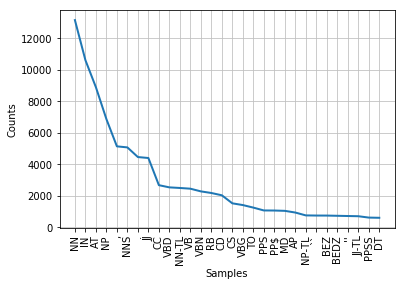

In [0]:
freq.plot(30, cumulative=False)

Como pudimos observar en el anterior ejercicio la categoría más común en este corpus es "NN", ahora usaremos el DefaultTagger para asignar a todo token el tag "NN" y luego evaluaremos su desempeño.

In [0]:
# Importamos las oraciones correctamente etiquetadas del corpus
brown_tagged_sentences = brown.tagged_sents(categories="news")
# Definimos nuestro tagger por defecto con la categoría más común
default_tagger = nltk.DefaultTagger("NN")
# Evaluamos el tagger por defecto contra las oraciones correctamemnte etiquetadas
print(default_tagger.evaluate(brown_tagged_sentences))

0.13089484257215028


Vemos que el desempeño obtenido por el DefaultTagger es del 13% lo cual es muy bajo, aún usando la etiqueta más popular acertar en una tarea tan compleja requiere de estrategias más sofisticadas y una gran cantidad de datos etiquetados correctamente para entrenamiento y evaluación.

### Sequential tagger

El DefaultTagger probado en la sección anterior es una subclase de la clase *SequentialBackoffTagger* que proporciona tags a tokens basado en la secuencia de aparición de los mismos, si el algoritmo es incapaz de determinar cual es el tag apropiado para un token recurrirá al BackoffTagger y le asignará un tag por defecto.

El DefaultTagger no es el único tagger secuencial existen tagger secuenciales más sofisticados, que analizaremos a continuación.

Para poder entrenar los taggers, debemos dividir el corpus en un conjunto de entreamiento y otro de test, como es habitual para los clasificadores.

In [0]:
# Dividimos los datos del corpus en datos de entrenamiento y evaluación 
train_data = brown_tagged_sentences[:int(len(brown_tagged_sentences)*0.9)]
test_data = brown_tagged_sentences[int(len(brown_tagged_sentences)*0.9):]

#### Regex tagger 


Un tagger secuencial es el Regex tagger que asigna tags no basándose en una palabra exacta sino en reglas que determinan si una palabra concuerda con un patrón regular predefinido relacionado con un tag particular. Por ejemplo, en el siguiente código definiremos algunas reglas que identifican la función de ciertos tokens en una oración para el idioma Inglés. Sabemos, por ejemplo, que los gerundios terminan en la secuencia de caracteres *-ing*, sabemos también que muchos sustantivos formados a partir de adjetivos terminan en el sufijo *-ness*.

Escribiremos las expresiones regulares para estas reglas y las enviaremos como parámetro al constructor de la clase *RegexpTagger*.

In [0]:
from nltk.tag.sequential import RegexpTagger

In [0]:
regexp_tagger = RegexpTagger([
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),# Cardinal numbers
    (r'(The|the|A|a|An|an)$', 'AT'),# Article
    (r'.*able$', 'JJ'),# Adjetives
    (r'.*ness$', 'NN'),# nouns formed from adj
    (r'.*ly$', 'RB'), # adverbs
    (r'.*s$', 'NNS'),# plural nouns
    (r'.*ing$', 'VBG'),# gerunds
    (r'.*ed$', 'VBD'),# Past tense verbs
    (r'.*','NN') # Default nouns
])

In [0]:
# evaluamos el modelo
print(regexp_tagger.evaluate(test_data))

0.31306687929831556


In [0]:
# confusion matrix 
from sklearn.metrics import confusion_matrix 
from nltk.tokenize import word_tokenize
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [0]:
text_test = []
ground_truth = []
for test_sent in test_data:
  for text, tag in test_sent:
    text_test.append(text)
    ground_truth.append(tag)

In [0]:
y_pred = regexp_tagger.tag(text_test)

In [0]:
predicted_tags = []
for _, tag in y_pred:
  predicted_tags.append(tag)

In [0]:
enc = LabelEncoder()
enc.fit(np.array(ground_truth))

LabelEncoder()

In [0]:
np.unique(np.array(ground_truth)).shape

(119,)

In [0]:
y_true = enc.transform(ground_truth)
y_pred = enc.transform(predicted_tags)

In [0]:
# confussion matrix 
c_matrix = confusion_matrix(y_true, y_pred)

In [0]:
c_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [0]:
import matplotlib.pyplot as plt

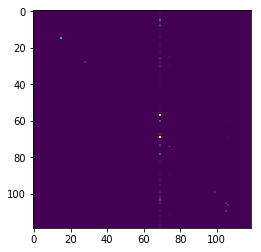

In [0]:
plt.imshow(c_matrix)

Como pudimos ver utilizando patrones regulares hemos alcanzado un desempeño del 31%.

#### N-gram tagger

Es una subclase de *SequentialTagger* donde el tagger toma como contexto las previas N palabras para predecir el POS tag para el token dado. Existen variaciones comunes del N-gram tagger tales como el UnigramTagger, BigramTagger y TrigramTagger. A continuación realizaremos ejemplos de su utilización.

In [0]:
# Importamos los taggers 
from nltk.tag import DefaultTagger
from nltk.tag import UnigramTagger
from nltk.tag import BigramTagger
from nltk.tag import TrigramTagger

In [0]:
# Entrenamos el unigram tagger
unigram_tagger = UnigramTagger(train_data, backoff=default_tagger)

In [0]:
# Evaluamos el desempeño del tagger 
print(unigram_tagger.evaluate(test_data))

In [0]:
# Entregamos el bigram tagger 
bigram_tagger = BigramTagger(train_data, backoff=unigram_tagger)
# Evaluamos el desempeño del bigram tagger
print(bigram_tagger.evaluate(test_data))

In [0]:
# Entrenamos el trigram tagger
trigram_tagger = TrigramTagger(train_data, backoff=bigram_tagger)
# evaluamos el desempeño
print(trigram_tagger.evaluate(test_data))

* El unigram tagger utiliza únicamente la frecuencia de los tags y asigna el más común; si no puede determinar el tag de un token, recurrirá al tag por defecto "NN".
* El bigram tagger toma en cuenta el tag de la palabra previa para asignar el siguiente tag; si no puede determinar el tag a asignar, asignará el predicho por el unigram tagger.
* Finalmente, el trigram tagger utilizará las dos palabras previas para asignar el tag; si no le es posible determinarlo, asignará el tag predicho por el bigram tagger. 

Combinando taggers secuenciales hemos obtenido un desempeño del 84% en el corpus Brown. Con este valor podremos utilizar estos taggers para extraer información o realizar análisis gramatical con un alto nivel de confianza.

#### Backoff Tagger

Backoff tagging es una de las principales características de la clase *SequentialBackoffTagger*. Esta función permite encadenar varios tagger de tal forma que cuando uno de ellos no sepa como etiquetar un token lo pasará al siguiente tagger en la lista hasta  que la palabra sea etiquetada o no se encuentren mas taggers en la lista.

En el siguiente código construiremos la función backoff_tagger que nos permitirá encadenar varios taggers secuenciales de forma sencilla y que utilizaremos posteriormente.

In [0]:
# Definimos la función que encadenará varios taggers
def backoff_tagger(train_sents, tagger_classes, backoff=None):
  """
  train_sents: Corpus oraciones de entrenamiento 
  tagger_classes: Lista de tagger clases
  backoff: Tagger por defecto
  """
  for cls in tagger_classes:
    backoff = cls(train_sents, backoff=backoff)
    
  return backoff

Replicaremos los resultados obtenidos encadenando n-gram taggers utilizando la función backoff_tagger.

In [0]:
# Definimos el tagger por defecto para etiquetar sustantivos
backoff = DefaultTagger("NN")
# Creamos el tagger encadenado
tagger = backoff_tagger(train_data, [UnigramTagger, BigramTagger, TrigramTagger], backoff=backoff)
# Evaluamos el desempeño del tagger en el conjunto de test
tagger.evaluate(test_data)

Hemos replicado el ejercicio realizado con los n-gram taggers pero de una manera mucho más sencilla. Ahora usaremos esta función y la clase *NgramTagger* para construir un QuadgramTagger.

In [0]:
# Para construir un tagger con N tokens debemos heredar de la clase NgramTagger 
# y en el constructor definimos el valor de N
from nltk.tag import NgramTagger

class QuadgramTagger(NgramTagger):
  def __init__(self, *args, **kwargs):
    NgramTagger.__init__(self, 4, *args, **kwargs)

In [0]:
# Definimos el tagger por defecto para etiquetar sustantivos
backoff = DefaultTagger("NN")
# Ahora encadenamos el QuadgramTagger con los anteriores taggers secuenciales
tagger = backoff_tagger(train_data, [UnigramTagger, BigramTagger, TrigramTagger, QuadgramTagger], 
                        backoff=backoff)
# Evaluamos el desempeño del tagger en el conjunto de test
tagger.evaluate(test_data)

A pesar de incrementar el número de tokens en el contexto no hemos obtenido una mejora en el desempeño. 

### Modelo probabilístico para etiquetar palabras

Podemos entrenar el unigram tagger para adoptar como modelo un conteo de frecuencias de palabras en un corpus. Así etiquetaría cada palabra basado en su etiqueta más común en el corpus. 

A continuación utilizaremos el corpus brown para entrenar el tagger unigram con las palabras más frecuentes.

In [0]:
# Importamos las clases FreqDist para conteo de frecuencias de palabras distintas 
# y ConditionalFreqDist para conteo condicional
from nltk.probability import FreqDist, ConditionalFreqDist

# Definimos la función que usará los conteos para construir el modelo
def word_tag_model(words, tagged_words, limit=200):
  fd = FreqDist(words)
  cfd =  ConditionalFreqDist(tagged_words)
  most_freq = (word for word, count in fd.most_common(limit))
  return dict((word, cfd[word].max()) for word in most_freq)

In [0]:
# Obtenemos el modelo 
model = word_tag_model(brown.words(), brown.tagged_words())
# Entrenamos el tagger 
likely_tagger = UnigramTagger(model=model)
# Evaluamos su desempeño
likely_tagger.evaluate(test_data)


*El* desempeño es de 50%. Trataremos de mejorarlo encadenando los diferentes taggers.

In [0]:
# Ahora encadenamos los taggers secuenciales
# y como backoff ponemos el tagger probabilístico (likely_tagger)
tagger = backoff_tagger(train_data, [UnigramTagger, BigramTagger, TrigramTagger], 
                        backoff=likely_tagger)
# Evaluamos el desempeño del tagger en el conjunto de test
tagger.evaluate(test_data)

Utilizando este tagger de manera encadenada obtenemos una mejora del 31% obteniendo así un desempeño de 81%.

### TnT Tagger 

El TnT tagger no es un tagger secuencial, en su lugar utiliza métodos estadísticos para determinar la etiqueta de cada palabra. Está basado en cadenas de Markov de segundo orden para establecer la etiqueta de una palabra. Para mayor información acerca de como funciona este tagger puede consultar el siguiente enlace: http://www.coli.uni-saarland.de/~thorsten/tnt/.

In [0]:
# Importamos el tagger 
from nltk.tag import tnt 
# Instanciamos el tager 
tnt_tagger = tnt.TnT()
# Lo entrenamos con los datos de entrenamiento
tnt_tagger.train(train_data)
# Evaluamos su desempeño
tnt_tagger.evaluate(test_data)

El resultado obtenido es de 84% únicamente utilizando el TnT tagger. 

Ahora lo encadenaremos con un tagger por defecto y evaluamos su desempeño.

In [0]:
# Tagger para tokens desconocidos
unk = DefaultTagger("NN")
# definimos el tagger por defecto con el argumento unk, 
# Debido a que ya hemos entrenado el TnT tagger, no lo volemos a entrenar y fijamos trained a true
tnt_tagger = tnt.TnT(unk=unk, Trained=True, N=100)
# Evaluamos el desempeño del modelo
tnt_tagger.evaluate(test_data)

En este corpus añadir un tagger por defecto  ha reducido el desempeño, sin embargo en otros conjuntos de datos esta modificación podría mejorar el desempeño del modelo. 

### Tagger basados en  clasificadores

También podemos utilizar un clasificador para etiquetar las palabras. En este caso el clasificador asignará una etiqueta a cada palabra de acuerdo a sus datos de entrenamiento. A continuación observaremos un ejemplo donde utilizaremos un clasificador para predecir las etiquetas de un token. 

Este tagger usa un clasificador para elegir la etiqueta de cada token en una oración. La entrada son los datos en entrenamiento que provee el corpus de Brown, por defecto se usa el algorítmo de NaiveBayes.

Al final se obtiene un nuevo etiquetador basado en el clasificador.

In [0]:
# Importamos el clasificador 
from nltk.tag.sequential import ClassifierBasedPOSTagger
# Instanciamos y entrenamos el clasificador 
class_tagger = ClassifierBasedPOSTagger(train=train_data)
# Evaluamos el desempeño del clasificador
class_tagger.evaluate(test_data)

Utilizando únicamente el clasificador hemos obtenido un desempeño del 88% el mejor que hemos obtenido en este conjunto de datos.

## Ejercicio

A continuación cargamos un texto correspondiente al capitulo 1 del libro Historia de dos ciudades de Charles Dikens:


In [0]:
# Por favor no sobreescriba o modifique esta celda
text1 = """
The Period

    It was the best of times,
    it was the worst of times,
    it was the age of wisdom,
    it was the age of foolishness,
    it was the epoch of belief,
    it was the epoch of incredulity,
    it was the season of Light,
    it was the season of Darkness,
    it was the spring of hope,
    it was the winter of despair,

we had everything before us, we had nothing before us, we were all going direct to Heaven, 
we were all going direct the other way— in short, the period was so far like the present period, 
that some of its noisiest authorities insisted on its being received, for good or for evil, 
in the superlative degree of comparison only.

There were a king with a large jaw and a queen with a plain face, on the throne of England; 
there were a king with a large jaw and a queen with a fair face, on the throne of France. 
In both countries it was clearer than crystal to the lords of the State preserves of loaves and fishes, 
that things in general were settled for ever.

It was the year of Our Lord one thousand seven hundred and seventy-five. Spiritual revelations were conceded to England at 
that favoured period, as at this. Mrs. Southcott had recently attained her five-and-twentieth blessed birthday, of whom a 
prophetic private in the Life Guards had heralded the sublime appearance by announcing that arrangements were made for 
the swallowing up of London and Westminster. Even the Cock-lane ghost had been laid only a round dozen of years, after rapping 
out its messages, as the spirits of this very year last past (supernaturally deficient in originality) rapped out theirs. 
Mere messages in the earthly order of events had lately come to the English Crown and People, from a congress of British 
subjects in America: which, strange to relate, have proved more important to the human race than any communications yet 
received through any of the chickens of the Cock-lane brood.

France, less favoured on the whole as to matters spiritual than her sister of the shield and trident, rolled with exceeding smoothness down hill,
making paper money and spending it. Under the guidance of her Christian pastors, she entertained herself, besides, with such humane achievements 
as sentencing a youth to have his hands cut off, his tongue torn out with pincers, and his body burned alive, because he had not kneeled down in 
the rain to do honour to a dirty procession of monks which passed within his view, at a distance of some fifty or sixty yards. It is likely enough 
that, rooted in the woods of France and Norway, there were growing trees, when that sufferer was put to death, already marked by the Woodman, 
Fate, to come down and be sawn into boards, to make a certain movable framework with a sack and a knife in it, terrible in history. 
It is likely enough that in the rough outhouses of some tillers of the heavy lands adjacent to Paris, there were sheltered from the weather 
that very day, rude carts, bespattered with rustic mire, snuffed about by pigs, and roosted in by poultry, which the Farmer, Death, had already 
set apart to be his tumbrils of the Revolution. But that Woodman and that Farmer, though they work unceasingly, work silently, and no one heard 
them as they went about with muffled tread: the rather, forasmuch as to entertain any suspicion that they were awake, was to be atheistical and 
traitorous.

In England, there was scarcely an amount of order and protection to justify much national boasting. Daring burglaries by armed men, 
and highway robberies, took place in the capital itself every night; families were publicly cautioned not to go out of town without 
removing their furniture to upholsterers' warehouses for security; the highwayman in the dark was a City tradesman in the light, and, 
being recognised and challenged by his fellow-tradesman whom he stopped in his character of “the Captain,” gallantly shot him through 
the head and rode away; the mail was waylaid by seven robbers, and the guard shot three dead, and then got shot dead himself by the other 
four, “in consequence of the failure of his ammunition:” after which the mail was robbed in peace; that magnificent potentate, 
the Lord Mayor of London, was made to stand and deliver on Turnham Green, by one highwayman, who despoiled the illustrious creature in 
sight of all his retinue; prisoners in London gaols fought battles with their turnkeys, and the majesty of the law fired blunderbusses in 
among them, loaded with rounds of shot and ball; thieves snipped off diamond crosses from the necks of noble lords at Court drawing-rooms; 
musketeers went into St. Giles's, to search for contraband goods, and the mob fired on the musketeers, and the musketeers fired on the mob, 
and nobody thought any of these occurrences much out of the common way. In the midst of them, the hangman, ever busy and ever worse 
than useless, was in constant requisition; now, stringing up long rows of miscellaneous criminals; now, hanging a housebreaker on Saturday 
who had been taken on Tuesday; now, burning people in the hand at Newgate by the dozen, and now burning pamphlets at the door of Westminster Hall; 
to-day, taking the life of an atrocious murderer, and to-morrow of a wretched pilferer who had robbed a farmer's boy of sixpence.

All these things, and a thousand like them, came to pass in and close upon the dear old year one thousand seven hundred and seventy-five. 
Environed by them, while the Woodman and the Farmer worked unheeded, those two of the large jaws, and those other two of the plain and the 
fair faces, trod with stir enough, and carried their divine rights with a high hand. Thus did the year one thousand seven hundred and 
seventy-five conduct their Greatnesses, and myriads of small creatures—the creatures of this chronicle among the rest—along the roads that 
lay before them.
"""

1. Separe el texto en tokens usando la función split(" ") de la clase string.

In [0]:
# Escriba aquí su código
word_tokens = 


2. Combine los n-gram taggers con el regex tagger, entrénelos en el corpus brown, imprima la evaluación sobre los datos de test de este corpus.





In [0]:
# Escriba aquí su código



3. Luego utilice el tagger que tenga el mejor desempeño para etiquetar al conjunto de tokens en la variable word_tokens y muestre una lista con todos los sustantivos, una con todos los adjetivos, y una con todos los verbos que se encuentren el arreglo word_tokens.

In [0]:
# Escriba aquí su código



# Bibliografía 

[1] Hardeniya, Nitin. NLTK essentials. Packt Publishing Ltd, 2015.

[2] Bird, Steven, Ewan Klein, and Edward Loper. Natural language processing with Python: analyzing text with the natural language toolkit. " O'Reilly Media, Inc.", 2009.

[3] Manning, Christopher, et al. "The Stanford CoreNLP natural language processing toolkit." Proceedings of 52nd annual meeting of the association for computational linguistics: system demonstrations. 2014.

[4] Perkins, Jacob. Python 3 text processing with NLTK 3 cookbook. Packt Publishing Ltd, 2014.




